# Weather Data Analysis Lab Notebook
### Name: Murali Krishna Chintha
### Course: MSCS-634-M40 – Advanced Big Data and Data Mining
### Assignment: Lab 1 – Data Visualization, Data Preprocessing, and Statistical Analysis Using Python in Jupyter Notebook

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Step 1: Data Collection

In [2]:
print("==== Step 1: Data Collection ====")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

# Load dataset
weather_df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/weatherAUS.csv")

# Display first five rows
print("First 5 rows of the dataset:")
print(weather_df.head())

==== Step 1: Data Collection ====
First 5 rows of the dataset:
         Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0  2008-12-01   Albury     13.4     22.9       0.6          NaN       NaN   
1  2008-12-02   Albury      7.4     25.1       0.0          NaN       NaN   
2  2008-12-03   Albury     12.9     25.7       0.0          NaN       NaN   
3  2008-12-04   Albury      9.2     28.0       0.0          NaN       NaN   
4  2008-12-05   Albury     17.5     32.3       1.0          NaN       NaN   

  WindGustDir  WindGustSpeed WindDir9am  ... Humidity9am  Humidity3pm  \
0           W           44.0          W  ...        71.0         22.0   
1         WNW           44.0        NNW  ...        44.0         25.0   
2         WSW           46.0          W  ...        38.0         30.0   
3          NE           24.0         SE  ...        45.0         16.0   
4           W           41.0        ENE  ...        82.0         33.0   

   Pressure9am  Pressure3pm  Cloud9

# Step 2: Data Visualization

Visualizing relationships and distributions in the dataset



### Heatmap of missing values

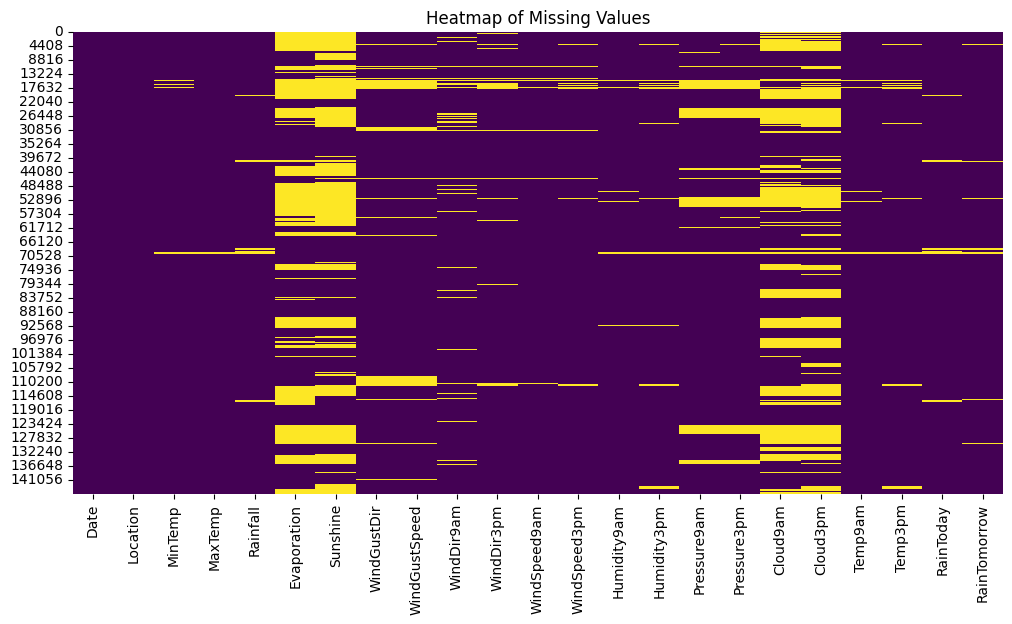

Above heatmap shows where missing values are located across columns.


In [3]:
plt.figure(figsize=(12,6))
sns.heatmap(weather_df.isnull(), cbar=False, cmap="viridis")
plt.title("Heatmap of Missing Values")
plt.show()
print("Above heatmap shows where missing values are located across columns.")

#### Scatter Plot: MaxTemp vs MinTemp

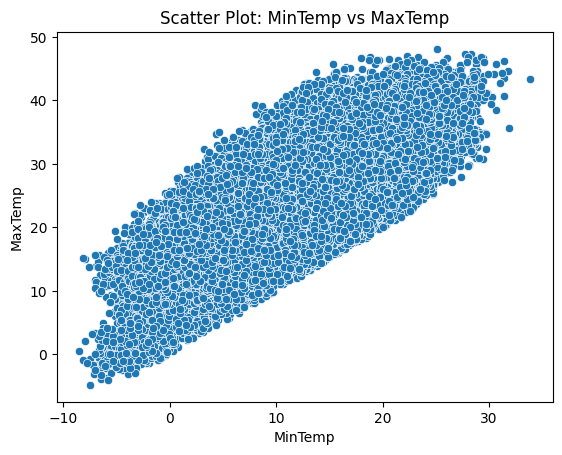

In [4]:
plt.figure()
sns.scatterplot(data=weather_df, x="MinTemp", y="MaxTemp")
plt.title("Scatter Plot: MinTemp vs MaxTemp")
plt.show()

#### Histogram: Rainfall

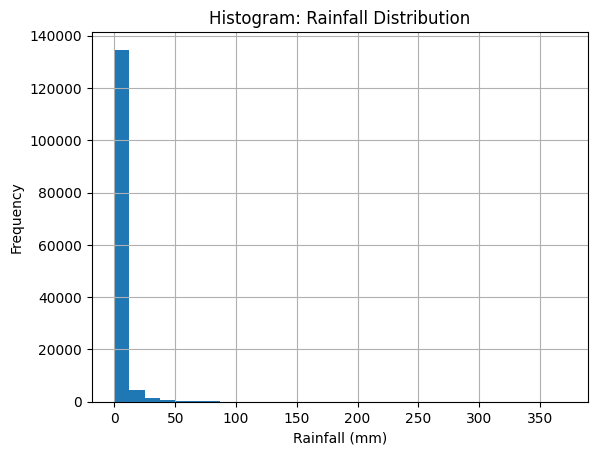

In [5]:
plt.figure()
weather_df["Rainfall"].hist(bins=30)
plt.title("Histogram: Rainfall Distribution")
plt.xlabel("Rainfall (mm)")
plt.ylabel("Frequency")
plt.show()

#### Box Plot: Rainfall

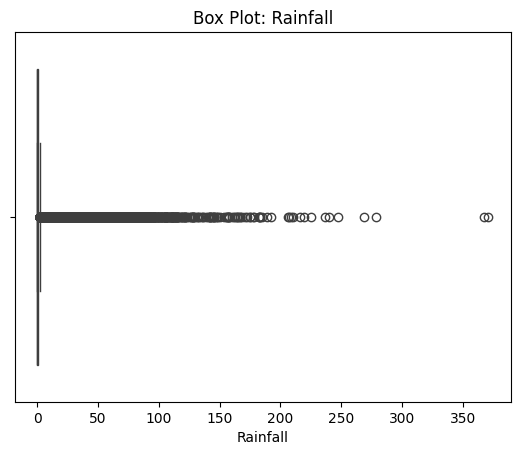

Boxplot shows presence of several extreme rainfall values.


In [6]:
plt.figure()
sns.boxplot(x=weather_df['Rainfall'])
plt.title("Box Plot: Rainfall")
plt.show()
print("Boxplot shows presence of several extreme rainfall values.")

#### Bar Plot: Count of RainToday

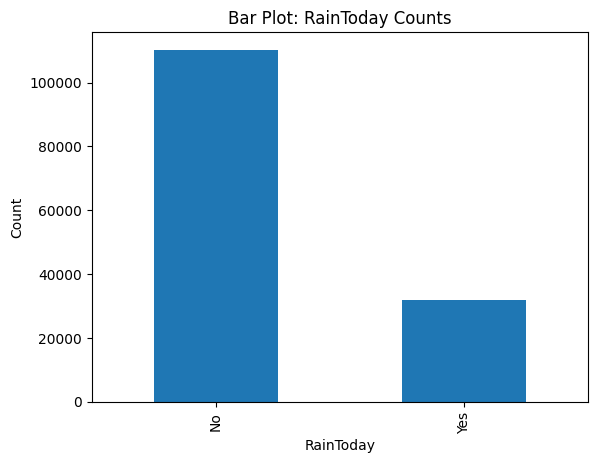

In [7]:
plt.figure()
weather_df['RainToday'].value_counts().plot(kind='bar')
plt.title("Bar Plot: RainToday Counts")
plt.xlabel("RainToday")
plt.ylabel("Count")
plt.show()

#### Pairplot of selected numeric columns

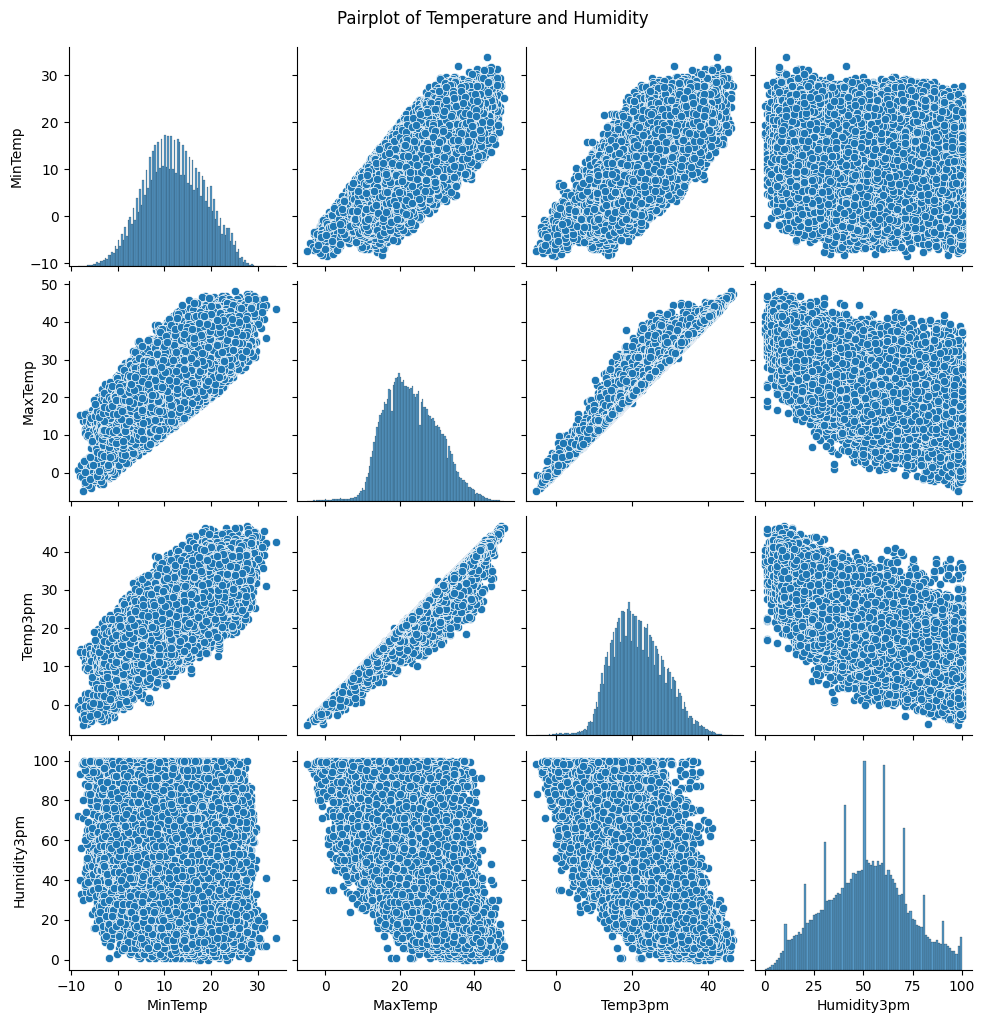

In [10]:
selected_cols = weather_df[["MinTemp", "MaxTemp", "Temp3pm", "Humidity3pm"]].dropna()
sns.pairplot(selected_cols)
plt.suptitle("Pairplot of Temperature and Humidity", y=1.02)
plt.show()

#### Boxplot of Rainfall by Location (using top 10 locations by count)

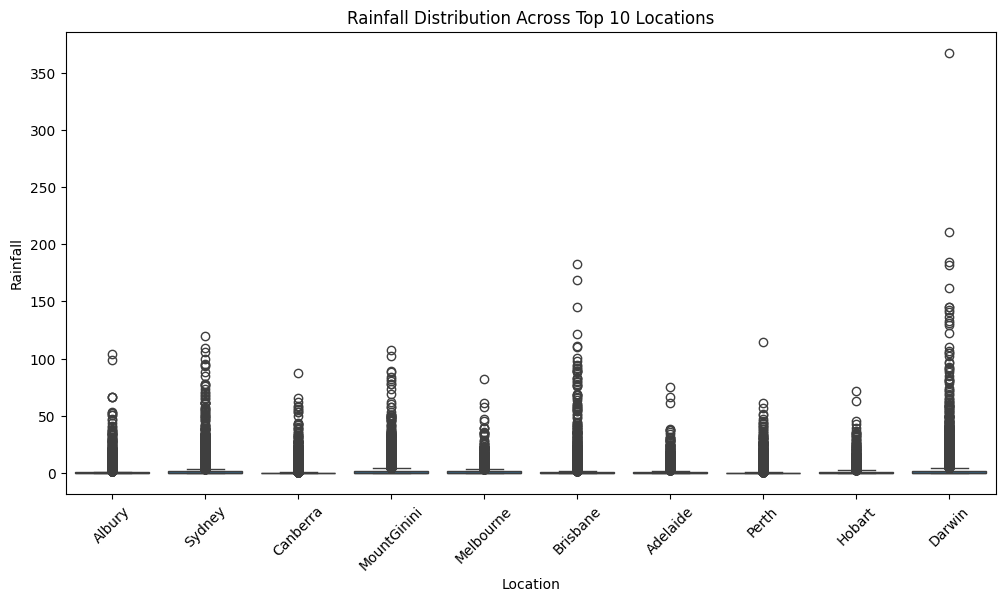

In [11]:
top_locations = weather_df['Location'].value_counts().head(10).index
plt.figure(figsize=(12,6))
sns.boxplot(x='Location', y='Rainfall', data=weather_df[weather_df['Location'].isin(top_locations)])
plt.title("Rainfall Distribution Across Top 10 Locations")
plt.xticks(rotation=45)
plt.show()

#### Lineplot of Avg MaxTemp over time (Albury only)

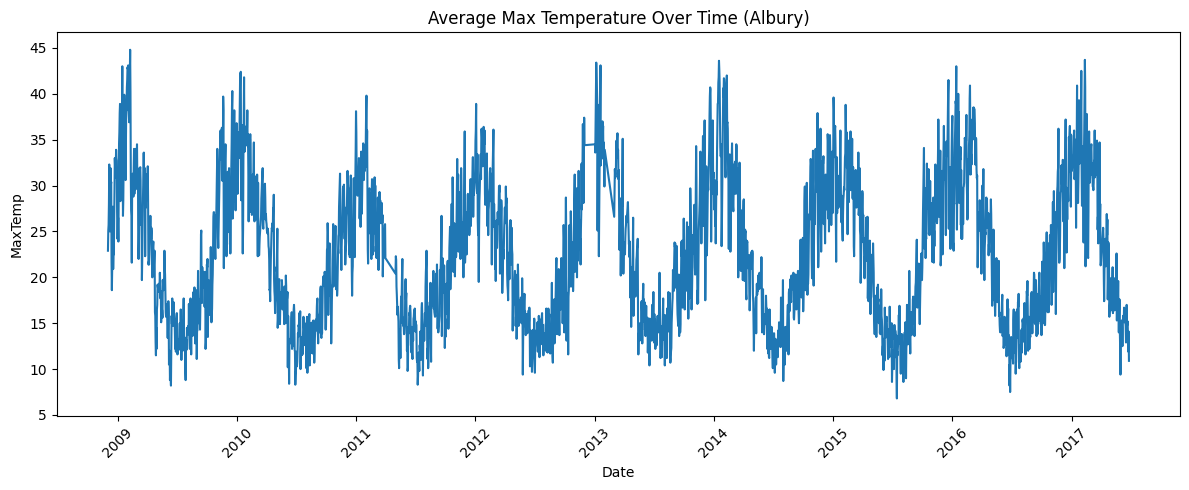

In [12]:
weather_df_sorted['Date'] = pd.to_datetime(weather_df_sorted['Date'])
lineplot_data = weather_df_sorted.groupby('Date')["MaxTemp"].mean().reset_index()
plt.figure(figsize=(12,5))
sns.lineplot(data=lineplot_data, x="Date", y="MaxTemp")
plt.title("Average Max Temperature Over Time (Albury)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Step 3: Data Preprocessing

#### 1. Handling Missing Values

In [13]:
print("Missing values before handling:")
print(weather_df.isnull().sum())
weather_df_filled = weather_df.copy()
weather_df_filled.fillna(weather_df.mean(numeric_only=True), inplace=True)
print("Missing values after handling:")
print(weather_df_filled.isnull().sum())
print("Numerical columns with missing values have been filled with their respective mean values.")

Missing values before handling:
Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64
Missing values after handling:
Date                 0
Location             0
MinTemp              0
MaxTemp              0
Rainfall             0
Evaporation          0
Sunshine             0
WindGustDir      10326
WindGustSpeed        0
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am         0
WindSpeed3pm         0
Humidity9am          0
Humidity3pm          0
Pressure9am          0
Pressure3pm          0
Clou

#### 2. Outlier Detection using IQR for 'Rainfall'

In [14]:

Q1 = weather_df_filled['Rainfall'].quantile(0.25)
Q3 = weather_df_filled['Rainfall'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
print("Rainfall IQR bounds:", lower_bound, upper_bound)
print("Data shape before outlier removal:", weather_df_filled.shape)
weather_df_outliers_removed = weather_df_filled[(weather_df_filled['Rainfall'] >= lower_bound) & (weather_df_filled['Rainfall'] <= upper_bound)]
print("Data shape after outlier removal:", weather_df_outliers_removed.shape)
print("Extreme values of rainfall have been removed based on IQR method.")

Rainfall IQR bounds: -1.5 2.5
Data shape before outlier removal: (145460, 23)
Data shape after outlier removal: (121737, 23)
Extreme values of rainfall have been removed based on IQR method.


#### 3. Data Reduction

In [15]:
print("Columns before reduction:", weather_df_outliers_removed.columns.tolist())
weather_df_reduced = weather_df_outliers_removed.drop(columns=["Evaporation", "Sunshine"])
print("Columns after reduction:", weather_df_reduced.columns.tolist())
print("Dropped columns with significant missing values to simplify analysis.")

Columns before reduction: ['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'RainToday', 'RainTomorrow']
Columns after reduction: ['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'RainToday', 'RainTomorrow']
Dropped columns with significant missing values to simplify analysis.


#### 4. Data Scaling: Min-Max Scaling for selected features

In [16]:
scaled_cols = ['MinTemp', 'MaxTemp', 'Rainfall']
scaler = MinMaxScaler()
print("Before scaling:")
print(weather_df_reduced[scaled_cols].describe())
weather_df_reduced[scaled_cols] = scaler.fit_transform(weather_df_reduced[scaled_cols])
print("After scaling:")
print(weather_df_reduced[scaled_cols].describe())
print("Features have been normalized to a 0-1 scale range for consistent analysis.")

Before scaling:
             MinTemp        MaxTemp       Rainfall
count  121737.000000  121737.000000  121737.000000
mean       12.005274      23.791194       0.247074
std         6.422494       7.060475       0.582699
min        -8.500000      -4.100000       0.000000
25%         7.400000      18.600000       0.000000
50%        12.000000      23.221348       0.000000
75%        16.600000      28.700000       0.200000
max        33.900000      48.100000       2.500000
After scaling:
             MinTemp        MaxTemp       Rainfall
count  121737.000000  121737.000000  121737.000000
mean        0.483615       0.534314       0.098830
std         0.151474       0.135258       0.233079
min         0.000000       0.000000       0.000000
25%         0.375000       0.434866       0.000000
50%         0.483491       0.523397       0.000000
75%         0.591981       0.628352       0.080000
max         1.000000       1.000000       1.000000
Features have been normalized to a 0-1 scale range 

# Step 4: Statistical Analysis

In [17]:
print("\nData Info:")
print(weather_df_reduced.info())
print("\nData Description:")
print(weather_df_reduced.describe())


Data Info:
<class 'pandas.core.frame.DataFrame'>
Index: 121737 entries, 0 to 145459
Data columns (total 21 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           121737 non-null  object 
 1   Location       121737 non-null  object 
 2   MinTemp        121737 non-null  float64
 3   MaxTemp        121737 non-null  float64
 4   Rainfall       121737 non-null  float64
 5   WindGustDir    113366 non-null  object 
 6   WindGustSpeed  121737 non-null  float64
 7   WindDir9am     112431 non-null  object 
 8   WindDir3pm     118255 non-null  object 
 9   WindSpeed9am   121737 non-null  float64
 10  WindSpeed3pm   121737 non-null  float64
 11  Humidity9am    121737 non-null  float64
 12  Humidity3pm    121737 non-null  float64
 13  Pressure9am    121737 non-null  float64
 14  Pressure3pm    121737 non-null  float64
 15  Cloud9am       121737 non-null  float64
 16  Cloud3pm       121737 non-null  float64
 17  Temp9am        121737 

#### Central Tendency

In [18]:

print("\nCentral Tendency Measures (MinTemp):")
print("Min:", weather_df_reduced['MinTemp'].min())
print("Max:", weather_df_reduced['MinTemp'].max())
print("Mean:", weather_df_reduced['MinTemp'].mean())
print("Median:", weather_df_reduced['MinTemp'].median())
print("Mode:", weather_df_reduced['MinTemp'].mode()[0])


Central Tendency Measures (MinTemp):
Min: 0.0
Max: 1.0
Mean: 0.48361495769146745
Median: 0.4834905660377359
Mode: 0.4880668486077576


#### Dispersion Measures

In [19]:
print("\nDispersion Measures (MinTemp):")
print("Range:", weather_df_reduced['MinTemp'].max() - weather_df_reduced['MinTemp'].min())
print("Variance:", weather_df_reduced['MinTemp'].var())
print("Std Dev:", weather_df_reduced['MinTemp'].std())


Dispersion Measures (MinTemp):
Range: 1.0
Variance: 0.022944346840141527
Std Dev: 0.15147391471848057


#### Skewness and Kurtosis

In [20]:
print("\nSkewness:")
print(weather_df_reduced.skew(numeric_only=True))
print("\nKurtosis:")
print(weather_df_reduced.kurt(numeric_only=True))


Skewness:
MinTemp          0.030167
MaxTemp          0.209136
Rainfall         2.611164
WindGustSpeed    0.898501
WindSpeed9am     0.765224
WindSpeed3pm     0.623257
Humidity9am     -0.410655
Humidity3pm      0.073111
Pressure9am      0.022125
Pressure3pm      0.040207
Cloud9am        -0.245267
Cloud3pm        -0.270450
Temp9am          0.062758
Temp3pm          0.238919
dtype: float64

Kurtosis:
MinTemp         -0.470891
MaxTemp         -0.240527
Rainfall         5.784558
WindGustSpeed    1.891155
WindSpeed9am     1.246927
WindSpeed3pm     0.801148
Humidity9am      0.034364
Humidity3pm     -0.370978
Pressure9am      0.462405
Pressure3pm      0.409615
Cloud9am        -0.666303
Cloud3pm        -0.431207
Temp9am         -0.327449
Temp3pm         -0.098336
dtype: float64


#### Covariance Matrix

In [21]:
print("\nCovariance Matrix:")
print(weather_df_reduced.cov(numeric_only=True))


Covariance Matrix:
                MinTemp   MaxTemp  Rainfall  WindGustSpeed  WindSpeed9am  \
MinTemp        0.022944  0.015187 -0.000102       0.416338      0.274926   
MaxTemp        0.015187  0.018295 -0.005630       0.249498      0.079425   
Rainfall      -0.000102 -0.005630  0.054326       0.190997      0.118720   
WindGustSpeed  0.416338  0.249498  0.190997     159.971371     62.136021   
WindSpeed9am   0.274926  0.079425  0.118720      62.136021     75.199569   
WindSpeed3pm   0.265560  0.102721  0.098251      71.205721     36.395557   
Humidity9am   -0.832788 -1.291570  0.965363     -68.856885    -53.256774   
Humidity3pm   -0.079028 -1.349295  1.077045     -23.860061    -14.373529   
Pressure9am   -0.457849 -0.346324 -0.071356     -34.512993    -11.693750   
Pressure3pm   -0.454278 -0.405868  0.001120     -32.367099     -9.635846   
Cloud9am       0.011094 -0.067375  0.084547       0.604023     -0.183162   
Cloud3pm      -0.002485 -0.057550  0.066525       1.474491      0.27

#### Correlation Matrix


Correlation Matrix:
                MinTemp   MaxTemp  Rainfall  WindGustSpeed  WindSpeed9am  \
MinTemp        1.000000  0.741280 -0.002897       0.217314      0.209301   
MaxTemp        0.741280  1.000000 -0.178588       0.145842      0.067715   
Rainfall      -0.002897 -0.178588  1.000000       0.064789      0.058737   
WindGustSpeed  0.217314  0.145842  0.064789       1.000000      0.566519   
WindSpeed9am   0.209301  0.067715  0.058737       0.566519      1.000000   
WindSpeed3pm   0.205004  0.088805  0.049291       0.658314      0.490772   
Humidity9am   -0.294169 -0.510922  0.221608      -0.291290     -0.328599   
Humidity3pm   -0.026530 -0.507265  0.234975      -0.095927     -0.084284   
Pressure9am   -0.466515 -0.395184 -0.047250      -0.421156     -0.208126   
Pressure3pm   -0.461684 -0.461936  0.000740      -0.393952     -0.171058   
Cloud9am       0.032492 -0.220975  0.160917       0.021185     -0.009370   
Cloud3pm      -0.007839 -0.203349  0.136407       0.055716      0.0

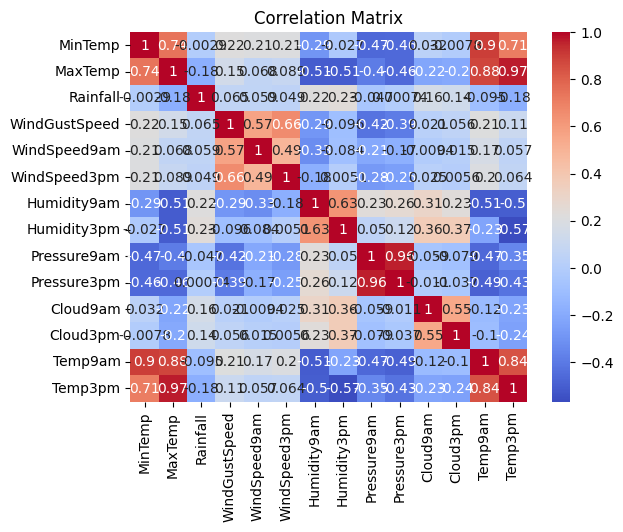

In [22]:
print("\nCorrelation Matrix:")
correlation_matrix = weather_df_reduced.corr(numeric_only=True)
print(correlation_matrix)
plt.figure()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

#### Frequency of Categorical Feature

In [23]:
print("\nFrequency Counts for 'RainToday':")
print(weather_df_reduced['RainToday'].value_counts())


Frequency Counts for 'RainToday':
RainToday
No     110319
Yes      8157
Name: count, dtype: int64


#### Final Insights

In [27]:
print("\n==== Final Insights ====")
print("- There is a strong positive correlation between MinTemp and MaxTemp.")
print("- Rainfall data originally contained many outliers; IQR filtering significantly improved distribution.")
print("- Missing values were effectively handled using mean imputation for numerical fields.")
print("- Normalizing temperature and rainfall values enabled consistent statistical analysis.")
print("- RainToday distribution shows class imbalance, useful in later classification tasks if applied.")
print("\n\n")
print("==== Additional Insights ====")
print("- Rainfall distribution is highly right-skewed, with a skewness of 2.61, indicating that most days are dry with occasional extreme rain events.")
print("- Rainfall also exhibits high kurtosis (5.78), confirming the presence of heavy tails and extreme outliers even after IQR filtering.")
print("- Humidity at 9am is negatively correlated with temperature, suggesting that cooler mornings tend to have higher humidity levels.")
print("- MinTemp and MaxTemp are strongly positively correlated, reflecting expected daily temperature patterns.")
print("- Wind speeds and gusts show moderate positive correlation with rainfall, implying windier conditions may coincide with rainy days.")
print("- Cloud coverage (Cloud9am/Cloud3pm) shows mild left skew, meaning most days are partly to fully cloudy.")
print("- Most numerical features such as temperature and pressure exhibit near-normal distributions after scaling, supporting the suitability for further statistical modeling.")


==== Final Insights ====
- There is a strong positive correlation between MinTemp and MaxTemp.
- Rainfall data originally contained many outliers; IQR filtering significantly improved distribution.
- Missing values were effectively handled using mean imputation for numerical fields.
- Normalizing temperature and rainfall values enabled consistent statistical analysis.
- RainToday distribution shows class imbalance, useful in later classification tasks if applied.



==== Additional Insights ====
- Rainfall distribution is highly right-skewed, with a skewness of 2.61, indicating that most days are dry with occasional extreme rain events.
- Rainfall also exhibits high kurtosis (5.78), confirming the presence of heavy tails and extreme outliers even after IQR filtering.
- Humidity at 9am is negatively correlated with temperature, suggesting that cooler mornings tend to have higher humidity levels.
- MinTemp and MaxTemp are strongly positively correlated, reflecting expected daily tempera